In [7]:
#Cargando librerias
import keras
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np

#Cargando dataset Fashion MNIST
fmnist = keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

Label: 0
Image:
 [[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  

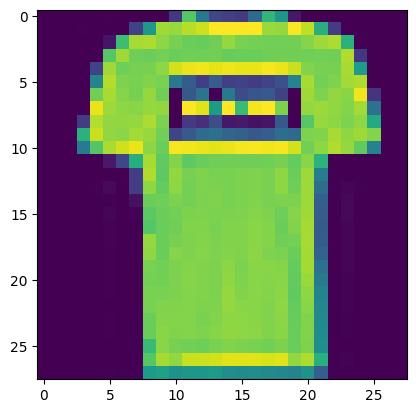

In [8]:
#Visualizando una muestra
index = 1
np.set_printoptions(linewidth=320)
print(f"Label: {training_labels[index]}")
print(f"Image:\n {training_images[index]}")
plt.imshow(training_images[index])

In [23]:
#Normalizando los valores de los pixeles
training_images = training_images / 255.0
test_images = test_images / 255.0

#Constuyendo el modelo
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

#Compilando el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1005 - loss: 2.3127
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1009 - loss: 2.3090
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0991 - loss: 2.3096
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1022 - loss: 2.3084
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1027 - loss: 2.3080
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1073 - loss: 2.3056
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1081 - loss: 2.3046
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1097 - loss: 2.3031
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1188 - loss: 2.3012
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1161 - loss: 2.2993


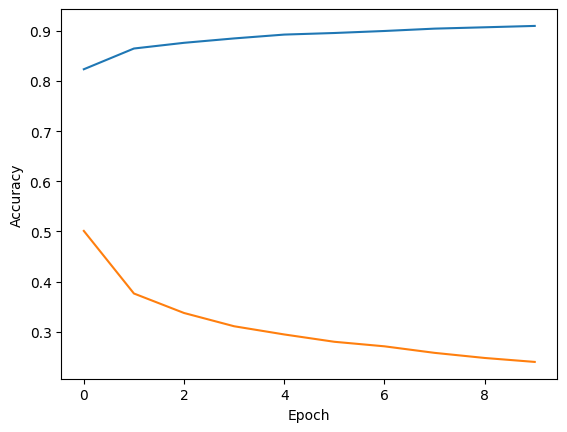

In [21]:
#Graficando historial de entrenamiento
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [22]:
#Evaluando el modelo con el conjunto de entrenamiento
loss, accuracy = model.evaluate(training_images, training_labels)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

#Evaluando el modelo con el conjunto de prueba
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 937us/step - accuracy: 0.1000 - loss: 2.6957
Loss: 2.6936585903167725
Accuracy: 0.10000000149011612
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.0962 - loss: 2.6985
Loss: 2.693652629852295
Accuracy: 0.10000000149011612


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: [[2.4541983e-05 1.7016678e-06 9.3319422e-01 9.9617375e-07 6.5224953e-02 6.1986694e-11 1.5525945e-03 4.6467267e-07 4.7254329e-07 1.2241781e-08]]
Predicted label: 2
True label: 2


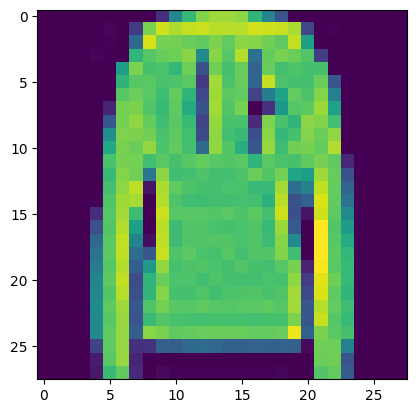

In [17]:
#Prediciendo una muestra
index = 525
prediction = model.predict(test_images[index:index+1])
print(f"Prediction: {prediction}")
print(f"Predicted label: {np.argmax(prediction)}")
print(f"True label: {test_labels[index]}")
plt.imshow(test_images[index])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step


<Axes: >

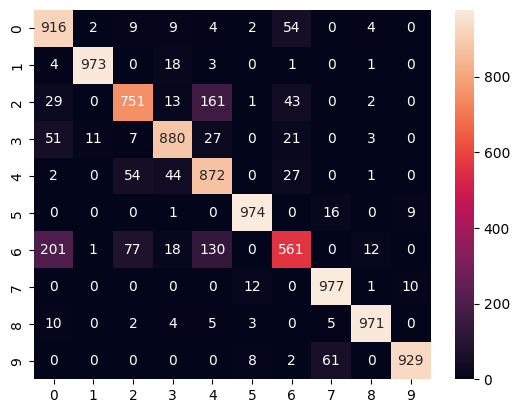

In [19]:
#Calculando y grafiando la matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = model.predict(test_images)
conf_matrix = confusion_matrix(test_labels, np.argmax(predictions, axis=1))
sns.heatmap(conf_matrix, annot=True, fmt='d')